<a href="https://colab.research.google.com/github/Lucas-Silva-R/Portfolio-de-Projetos/blob/main/An%C3%A1lise_de_Fraude_Cart%C3%A3o_de_Cr%C3%A9dito_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**Projeto de Detecção de fraudes em cartão de crédito**

por *[Lucas Ribeiro da Silva](https://github.com/Lucas-Silva-R/Portfolio-de-Projetos)*

---

<img src='https://img.freepik.com/free-vector/colored-flat-hacker-runs-away-composition-man-steal-credit-card-runs-vector-illustration_1284-30699.jpg?w=740&t=st=1652015915~exp=1652016515~hmac=baa74a41f6411445e49fd760889631867dd11825f221cb78cc57e5c8795b3518' >

##1) Contexto

A fraude de cartão de crédito consiste em [uma das formas de roubo de identidade na qual o criminoso toma posse das informações do cartão de credito de outra pessoa com a intenção de realizar compras com os recursos da vítima](https://www.law.cornell.edu/wex/credit_card_fraud) (Legal Information Institute, Cornwell University).

Estima-se que durante o percurso da próxima decada, [a fraude de cartão irá custar à industria global um total de 408,5 bilhões de dólares. Para colocar em perspectiva, em 2030 espera-se que o volume de transações atinga um total de 79,14 trilhão de dólares e que, desse total, 49,32 bilhões sejam perdidos devido a fraudes](https://www.paymentsdive.com/news/card-industry-faces-400b-in-fraud-losses-over-next-decade-nilson-says/611521/) (Mullen, 2021).

O Brasil também é um país que sofre bastante com problemas de fraude de cartão de crédito. [Durante o primeiro semestre de 2021 foi reportado um crescimento de mais de 30% no número de tentativas de fraude. De 182 milhões de transações ocorridas, houveram 2,6 milhões de tentativas de fraude (~1,5%), valor fortemente associado ao momento de pandemia e aumento de comprar feitas online](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/) (Sutto, 2021). 

O receio de ter suas informações de compra roubadas é algo que afeta qualquer cidadão no mundo e é bem forte no Brasil, [onde 83% dos cidadão demonstra preocupação de terem seus cartões de crédito fraudados](https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html) (Gil, 2021), algo que é compreensível considerando que [o Brasil é também um dos países líderes em "vazamento de dados de cartões" de modo que 7 das 10 instituições financeiras líderes neste ranking são brasileiras](https://extra.globo.com/economia-e-financas/brasil-campeao-no-vazamento-de-cartoes-com-454-dos-casos-no-mundo-24861963.html) (Cardoso, 2021). 

Com o progressivo crescimento do número de casos de fraude de cartão de crédito e o risco que representam para os usuários, governo e instituições financeiras, diversas soluções tecnológicas foram sendo desenvolvidas para reduzir o número fraudes, principalmente no campo de Machine Learning de modo que [diversos métodos de detecção foram sendo desenvolvidos](https://seon.io/resources/credit-card-fraud-detection/#h-credit-card-fraud-detection-methods) (Jendruszak, 2021) inclusive [várias soluções diferentes só no campo de Machine Learning](https://spd.group/machine-learning/credit-card-fraud-detection/) (Chuprina & Kovalenko, 2022).

Considerando este crescente e recorrente problema, e inspirado nas soluções em Machine Learning desenvolvidas para solucioná-lo, decidi criar um projeto focado em desenvolver um modelo de Machine Learning capaz de prever a ocorrência de fraudes de cartão de crédito.

---

##2) Fonte de Dados, Dicionário de variáveis e Importação dos pacotes e base de dados

###Fonte de dados

Os dados utilizados neste projeto foram obtidos por meio de um dataset de livre acesso públicado no "Kaggle" - uma comunidade online de estudantes de ciências de dados e machine learning. A base de dados contém informações de usuários europeus que fizeram transações de cartão de crédito durante o mês de Setembro de 2013. Ao todo, estão presentes informações de 2 dias de transações.

###Dicionário de variáveis
* `Time` - Representa a diferença em segundos de cada uma das transações realizadas comparadas ao momento de realização da primeira transação registrada na base.
* `Amount` - Consiste no valor transacionado em cada operação de cartão de crédito. 
* `Class` - Variável binária que representa a ocorrência ou não de uma fraude. 0 significa que não houve fraude, 1 significa que houve fraude.

Os demais campo na base (`V1` até `V28`) contêm variáveis numéricas obtidas através de um processo chamado "Análise de Componentes Principais" (Principal Component Analysis - PCA). Em síntese, o PCA é um método de machine learning não-supervisionado voltado para redução de dimensionalidade dos dados. O método busca estimar dois vetores: a) o eixo principal - que representa a distância máxima e mínima dos pontos; b) extensão do vetor - que representa a distribuição/variância destes dados. 

A redução de dimensionalidade do PCA consiste em ["reduzir um ou mais dos menor componentes principais, de modo a criar uma projeção de baixa dimensão dos dados ao mesmo tempo que preserva o máximo da variância destes dados"](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) (VanderPlas, 2016)

Isto foi feito devido ao fato de conterem informações sensíveis de usuários, o que é uma limitação do projeto, pois restringe o conhecimento e contexto mais extenso de cada um destes 28 campos.

###Importação dos pacotes e base de dados

A seguir serão feitas as importações dos pacotes necessários para:
* Importar a base de dados
* Criar as visões gráficas dos resultados
* Processar o modelo de Machine Learning
* Calcular a qualidade e fit do modelo desenvolvido

In [1]:
#importando os pacotes básicos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importando o pacote para separar os dados
from sklearn.model_selection import train_test_split

#importando os pacotes para mensurar qualidade e fit do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#importando a base de dados
path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(path)

---

##3) Análise Exploratória dos Dados

A seguir serão realizadas uma análise exploratória inicial dos dados importados. Esta etapa é essêncial para destacar informações básicas da fonte de dados como: 
* Tamanho
* Informações dos atributos (nome e tipo)
* Presença de valores nulos
* Informações estatísticas básicas (média, desvio padrão)
* Balanceamento dos dados
* Presença de outliers

###3.1 Tamanho do dataframe

Abaixo será examinado o tamanho do dataframe (nº de entradas e nº de atributos). Isso esclarece a quantidade de dados disponíveis, algo bastante importante para qualquer modelo de Machine Learning, pois quanto mais dados disponíveis, mais informações estarão presentes para dar robustes ao modelo.

In [3]:
#tamanho do dataframe
print('Detalhamento do DataFrame')
print(f'Entradas do DataFrame: \t{df.shape[0]}')
print(f'Atributos do DataFrame: \t{df.shape[1]}')

#visualizar as primeiras entradas
df.head()

Detalhamento do DataFrame
Entradas do DataFrame: 	284807
Atributos do DataFrame: 	31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Título das colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Ao todo a base de dados possui **284.807** com **31** atributos distintos. Existe uma boa quantidades de dados para construir e validar um modelo de Machine Learning. Dentre os atributos disponíveis estão `Time`, `Amount`, `Class`. Existem demais outras variáveis que variam entre `V1` até `V28`. Infelizmente não é possível visualizar o que cada campo representa, mas sabe-se que eles provavelmente apoiarão o modelo a ser construído.

###3.2 Tipo dos dados

Além de saber o tamanho e nome dos campos do dataframe é importante esclarecer também qual o formato dos dados disponíveis de cada atributo. O formato do dado pode afetar negativamente posteriores análises e testes matemáticos (ex.: o número 2 em formato de texto). Um clássico exemplo são campos de tempo (data, hora) que não vem formatados devidamente e limitam as análises se não forem convertidos.

In [5]:
#Formato dos valores de cada coluna do dataset
pd.DataFrame(df.dtypes, columns=['Tipo'])

,Tipo
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


Com exceção do atributo `Class`, todos os demais campos possuem seus dados com o tipo **flutuante**, ou seja, números com casas decimais. `Class` possui o tipo **inteiro**, pois seus valores são resultados binários, ou seja, "0" ou "1" onde "0" indica que **não houve fraude** e "1" indica que **houve fraude**. Em geral, os dados não apresentam nenhum problema de formatação e poderão ser utilizados no formato que estão

###3.3 Valores nulos

Em seguida, é importante verificar a existência de valores nulos dentro do dataframe. Campos vazios significam ausência de dados o que pode prejudicar a interpretação de certas informações nas entradas ou mesmo ao estudar um conjunto de dados maior. Para um modelo de Machine Learning este é um tópico ainda mais preocupante, pois entradas sem dados podem afetar os resultados do modelo como um todo. Assim, importa muito determinar se há ausência e  a quantidade. 

In [6]:
#Verificação de valores ausentes
pd.DataFrame(df.isnull().sum().sort_values(ascending=False), 
             columns=['Valores Vazios'])

,Valores Vazios
Time,0
V16,0
Amount,0
V28,0
V27,0
V26,0
V25,0
V24,0
V23,0
V22,0


Percebe-se que **não existem valores ausentes**. Em outras palavras, não há risco de a ausência de dados danificar as análises e modelos a serem construídos em seguida.

###3.4 Informações estatísticas básicas

Em seguida, serão calculadas algumas informações estatísticas básicas (média, mediana, quartis, desvio padrão, etc). Estas informações ajudam a entender como estão distribuídos os dados na fonte importada e identificar possíveis problemas como, por exemplo, a presença de outliers.

In [7]:
#Resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Em geral são poucas as observações relacionadas aos dados. Todos os campos de `V1`até `V28` possuem valores bem distribuídos entre si, pois passarão pelo processo de Principal Component Analysis (PCA) que reduziu a dimensionalidade dos valores e, consequentemente, os centralizou mais. Em relação ao campo `Amount`, entretanto, é possível perceber a disparidade do valor máximo em relação ao 3º quartil, o que é um indicativo de existência de outliers. O histograma abaixo do campo `Amount` reforça isso.

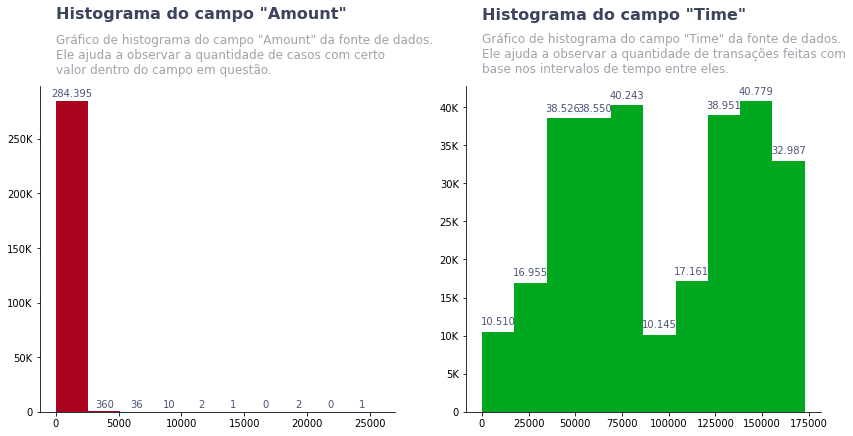

In [8]:
#Cores e rótulos do eixo y
wine = '#A8031F'
forest = '#00A820'
cyan = '#00DEF5'
gray_title = '#3C445E'
gray_subtitle = '#A1A3AB'

ya = ['0', '50K', '100K', '150K', '200K', '250K']
yt = ['0', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K']

#Criação dos gráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Histograma de "Amount"
df['Amount'].plot(kind='hist', bins=10, color=wine, ax=ax1)

ax1.text(x=-5.5, y=360000, s='Histograma do campo "Amount"', fontsize=16, fontweight='bold', 
        color=gray_title)
ax1.text(x=-5.5, y=310000, s='Gráfico de histograma do campo "Amount" da fonte de dados.\nEle ajuda a observar a quantidade de casos com certo\nvalor dentro do campo em questão.', 
        fontsize=12, color=gray_subtitle)

#Configuração de aparência (Histograma "Amount")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_ylabel('')
ax1.set_yticklabels(ya)

for i in ax1.patches:
  ax1.text(i.get_x() + i.get_width() / 2, i.get_height() + 4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 10)

#Histograma de "Time"
df['Time'].plot(kind='hist', bins=10, color=forest, ax=ax2)

ax2.text(x=-2.2, y=51550, s='Histograma do campo "Time"', fontsize=16, fontweight='bold', 
        color=gray_title)
ax2.text(x=-2.2, y=44500, s='Gráfico de histograma do campo "Time" da fonte de dados.\nEle ajuda a observar a quantidade de transações feitas com\nbase nos intervalos de tempo entre eles.', 
        fontsize=12, color=gray_subtitle)

#Configuração de aparência (Histograma "Time")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_ylabel('')
ax2.set_yticklabels(yt)

for i in ax2.patches:
  ax2.text(i.get_x() + i.get_width() / 2, i.get_height() + 900,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 10)

plt.show()

Como pode ser observado, quase todas entradas da base de dados em questão possuem valores em `Amount` que são menores que **20**. Se somados todos os casos em que `Amount` possui valor maior que **20**, chega-se a um total de **52 casos**, um número bastante ínfimo em comparação a maioria da distribuição. Já no histograma de `Time` a distribuição dos dados se apresenta mais equilibrada de forma que os casos em geral estão bem próximos do valore medianos de 0.  

Assim, pode-se concluir que os valores presentes no campo `Amount` possuem outliers em sua distribuição. Entretanto, como estes casos podem estar relacionados a casos de fraude não é de interesse do estudo remover estes valores.



Além das visões acima, como o intuito do trabalho é identificar e prever com um certo grau de precisão os casos que são e irão ser de fraude, é interessante investigar como estão distribuidos os valores de `Amount` e `Time` quando separados os casos em que houve fraude (1) dos casos em que não houve fraude (2).

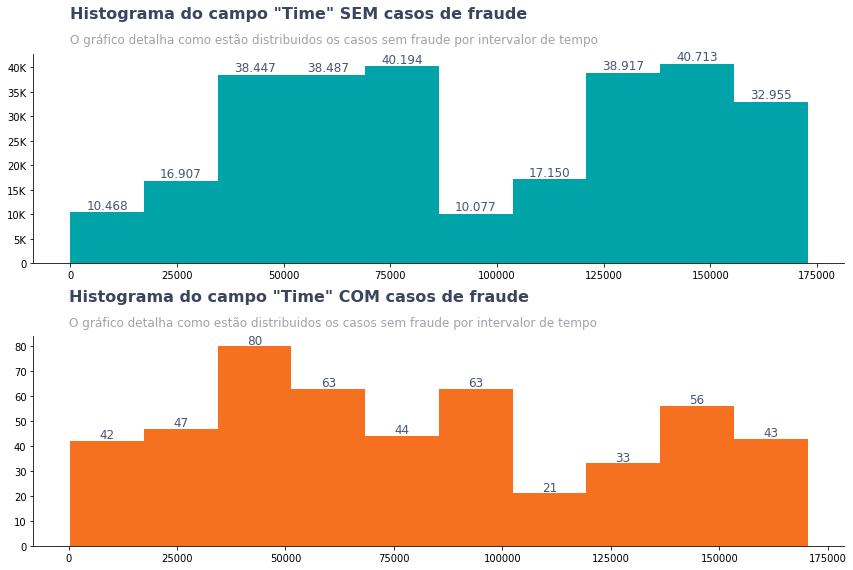

In [9]:
#Cores
orange = '#F5711F'
blue = '#00A4A8'

#Histograma Time
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))

ax1.hist(df['Time'][df['Class'] == 0] , bins=10, color=blue)

#Configuração de aparência (Histograma SEM)
ax1.text(x=-2.18, y=50000, s='Histograma do campo "Time" SEM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax1.text(x=-2.18, y=45000, s='O gráfico detalha como estão distribuidos os casos sem fraude por intervalor de tempo', 
        fontsize=12, color=gray_subtitle)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_ylabel('')
ax1.set_yticklabels(['0', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K'])

for i in ax1.patches:
  ax1.text(i.get_x() + i.get_width() / 2, i.get_height()+700,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

#Histograma COM
ax2.hist(df['Time'][df['Class'] == 1] , bins=10, color=orange)

#Configuração de aparência (Histograma COM)
ax2.text(x=-2.17, y=98, s='Histograma do campo "Time" COM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax2.text(x=-2.17, y=88, s='O gráfico detalha como estão distribuidos os casos sem fraude por intervalor de tempo', 
        fontsize=12, color=gray_subtitle)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_ylabel('')

for i in ax2.patches:
  ax2.text(i.get_x() + i.get_width() / 2, i.get_height()+1,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

plt.tight_layout()

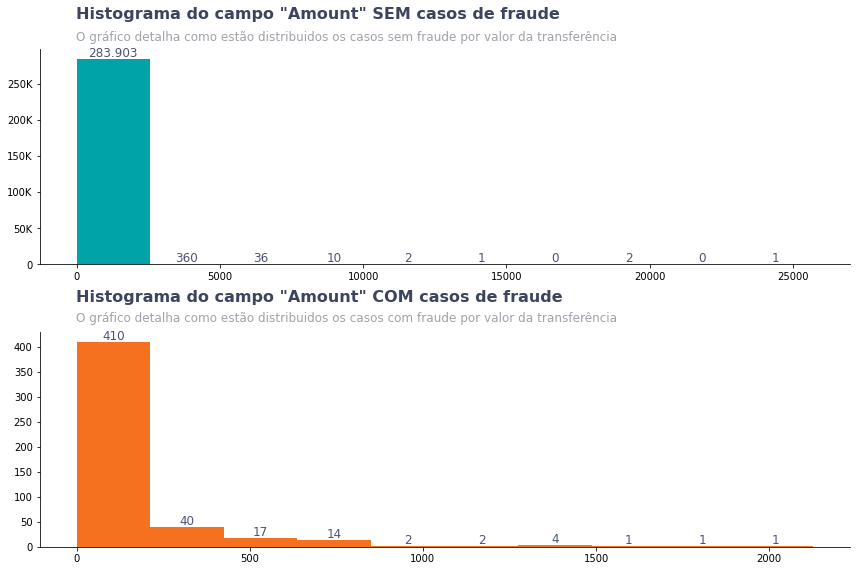

In [10]:
#Histograma Amount
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))

#Configuração de aparência (Histograma SEM)
ax1.hist(df['Amount'][df['Class'] == 0] , bins=10, color=blue);

ax1.text(x=-5.6, y=340000, s='Histograma do campo "Amount" SEM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax1.text(x=-5.6, y=310000, s='O gráfico detalha como estão distribuidos os casos sem fraude por valor da transferência', 
        fontsize=12, color=gray_subtitle)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_ylabel('')
ax1.set_yticklabels(['0', '50K', '100K', '150K', '200K', '250K'])

for i in ax1.patches:
  ax1.text(i.get_x() + i.get_width() / 2, i.get_height()+4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

#Configuração de aparência (Histograma COM)
ax2.hist(df['Amount'][df['Class'] == 1] , bins=10, color=orange)

ax2.text(x=-0.8, y=490, s='Histograma do campo "Amount" COM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax2.text(x=-0.8, y=450, s='O gráfico detalha como estão distribuidos os casos com fraude por valor da transferência', 
        fontsize=12, color=gray_subtitle)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_ylabel('')

for i in ax2.patches:
  ax2.text(i.get_x() + i.get_width() / 2, i.get_height()+5,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

plt.tight_layout()

Tanto nos histogramas do campo `Time` quanto nos histogramas do campo `Amount` é possível perceber que a distribuição entre os casos COM fraude e SEM fraude são bem parecidos de maneira que continua bastante evidente o acumulo de transações no grupo entre 0 e 20 no campo `Amount`. Assim, mantem-se a conclusão de que o respectivo campo possui outliers. 

Para exibir com mais destaques estes outliers o boxplot abaixo foi construído.

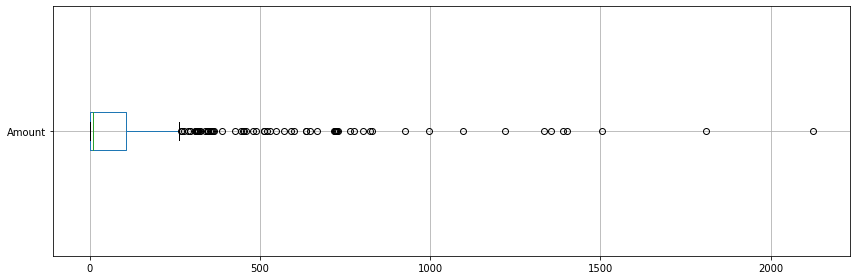

In [11]:
#Boxplot de amount
fig, ax = plt.subplots(figsize=(12, 4))

df.loc[df['Class'] == 1].boxplot(['Amount'], vert=False, ax=ax)

plt.tight_layout()

Apesar de constatados os outliers tanto nos casos sem fraude quanto nos casos com fraude, ainda não é seguro afirmar que os casos pertencentes ao grupo de outliers não possuem nenhuma conexão com a ocorrência de fraudes. Portanto, os valores serão mantidos na análise.

Feita a análise da distribuição dos valores nos campos `Amount` e `Time`, resta verificar como é o comportamento dos demais campos (`V1` até `V28`) quando não há ocorrência de fraude (0) e quando há ocorrência de fraude (1). Outra forma de examinar essa diferença é através de um gráfico de densidade estimada de Kernel (KDE) que exibe os valores da distribuição de forma contínua e facilita a visualização de diferenças. 

Ao observar o formato das curvas de densidade, quanto mais diferentes elas forem, mais o comportamento dos casos de fraude X não fraude são distintos, o que valida o campo como útil para o modelo preditivo.

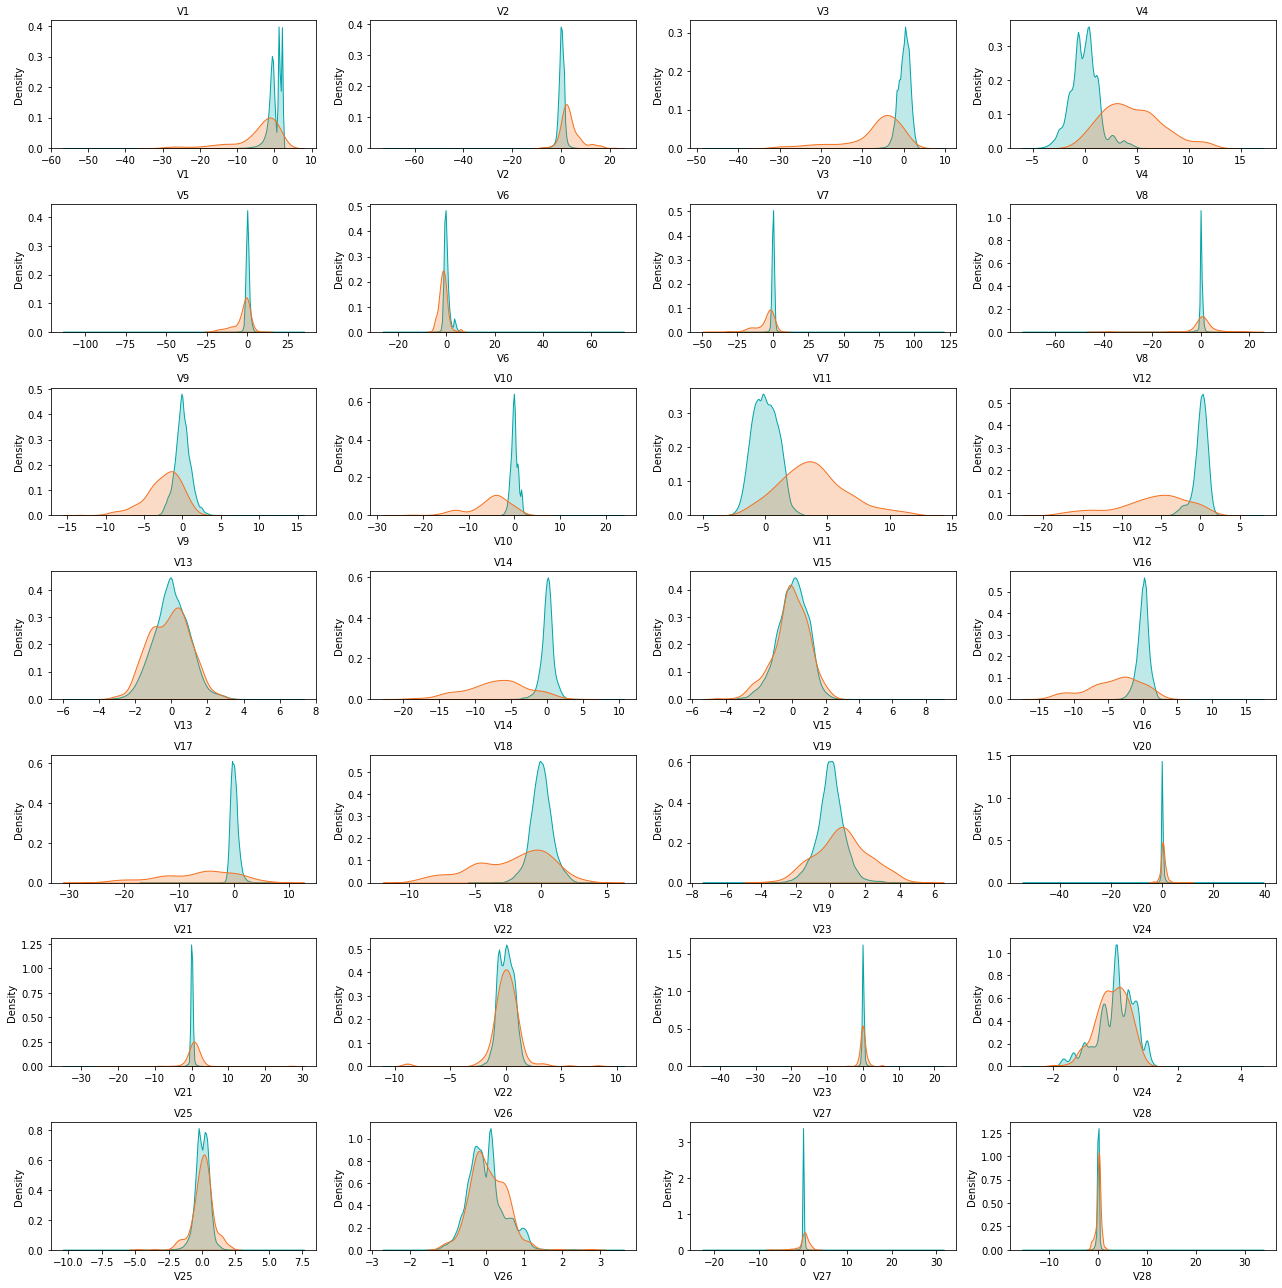

In [12]:
#Kernel Density Estimate de todos os atributos da base para identificar os atributos mais distintos

column_names = df.drop(['Class','Amount','Time'], axis=1).columns #remove as colunas que não são nomeadas
num_plots = len(column_names) #define a quantidade de gráficos
df_class_0 = df[df['Class'] == 0] #define os dados do gráfico 1
df_class_1 = df[df['Class'] == 1] #define os dados do gráfico 2

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18)) #cria a figura e espaço para a plotagem dos 28 graficos
fig.subplots_adjust(hspace=1, wspace=1) #ajusta o espaço entre os 28 gráficos

idx = 0 #contador
for col in column_names:
  idx += 1 #
  plt.subplot(7, 4, idx) #Define o espaçp onde cada gráfico será plotado
  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color=blue) #cria o gráfico de onda utilizando os dados de Vx da Classe 0
  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color=orange) #cria o gráfico de onda utilizando os dados de Vx da Classe 1
  plt.title(col, fontsize=10) #
plt.tight_layout() 

Por meio das visões acima, é bem mais fácil identificar as variáveis que possuem distribuições iguais do campo `Class` quando este é igual a 0 (sem fraude) em comparação quando este é igual a 1 (com fraude). Ao observar as variáveis `V13`, `V15`, `V22`, `V24`, `V25`, `V26` e `V28`, percebe-se que elas possuem distribuições de `Class` 0 e 1 parecidas enquanto os demais campos tem distribuições leve ou fortemente distintas. 

Como o intuito do modelo é identificar com mais precisão os casos de fraude (1) dos casos de não fraude (0), os campos com distribuições distintas têm a capacidade de contribuir bem mais para o modelo. Dito isto, o próximo ponto que necessariamente deve ser analisado para garantir a efetividade do modelo é garantir o balanceamento dos dados.

##4. Criação do modelo preditivo

Após feita toda a análise exploratória do conjunto de dados e verificados o formato dos dados, existência de valores nulos e/ou outliers, seguem as etapas para criação do modelo preditivo.

A configuração de um modelo preditivo engloba certo conjunto de etapas:
* Verificar o balanceamento dos dados (caso desequilibrado, é necessária a aplicação de alguma técnica de balanceamento)
* Padronização do dataset: Necessária para garantir que dados com escalas diferentes (ex.: idade (1-100) e valor transferido (1.000-1.000.000)) irão contribuir de forma equânime no modelo, ou seja, sem diferença de pesos.
* Escolha de técnica de Machine Learning a ser aplicada
* Definição dos hyperparâmetros
* Separação dos dados em grupos de treino e de teste
* Calcular o Fit e o Predict do modelo
* Examinar a qualidade do modelo desenhado

###4.1 Balanceamento e Padronização dos dados

Um importante requisito para garantir a efetividade de um modelo supervisionado de Machine Learning é a distribuição balanceada entre casos positivos e negativos do campo que se deseja prever. No presente estudo, deseja-se prever a ocorrência de fraudes de cartão, cujas ocorrências estão registradas no campo `Class`, onde "0" significa que não houver fraude e "1" significa que houve fraude. Assim, é necessário verificar a quantidade de casos registrados de fraude e não fraude e determinar se há uma distribuição balanceada.  

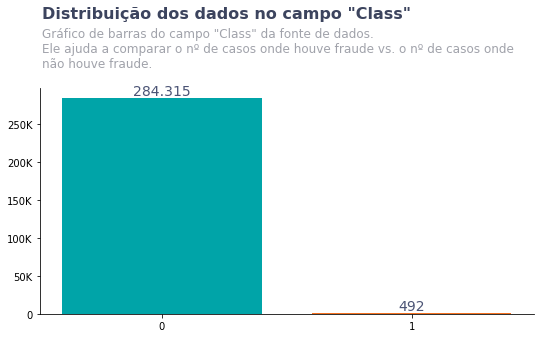

In [13]:
#balanceamento dos dados

case_1 = df['Class'][df['Class'] == 1].count() #qtd. de casos com fraude
case_0 = df['Class'][df['Class'] == 0].count() #qtd. de casos sem fraude

#gráfico de barras
orange = '#F5711F'
blue = '#00A4A8'

y = ['0', '50K', '100K', '150K', '200K', '250K']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar('0', case_0, color = blue)
ax.bar('1', case_1, color = orange)

ax.text(x=-0.48, y=390000, s='Distribuição dos dados no campo "Class"', 
        fontsize=16, fontweight='bold', color=gray_title)
ax.text(x=-0.48, y=325000, s='Gráfico de barras do campo "Class" da fonte de dados.\nEle ajuda a comparar o nº de casos onde houve fraude vs. o nº de casos onde\nnão houve fraude.', 
        fontsize=12, color=gray_subtitle)

#mudança na aparência
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticklabels(y)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 14)

plt.tight_layout()

O gráfico acima deixa bem evidente o desbalanceamento que existe entre os casos onde **houve fraude** contra aqueles em que **não houve fraude**. Os casos de fraude representam menos **0,2%** do total de dados da fonte utilizada. Para garantir que o modelo de Machine Learning consiga prever com sucesso os casos de fraude, é necessário que seja feito um rebalanceamento dos dados dos valores "1" (com fraude) ou dos valores "0" (sem fraude). Apesar de serem poucos os casos, é importante frisar que eles representam uma perda de mais de **400 bilhões de dólares** na indústria como um todo.

Para lidar com o problema de balanceamento de dados, existem algumas técnicas em Machine Learning que solucionam esta questão. As duas principais técnicas são Oversampling e Undersampling.

###4.1.1 Undersampling

De forma resumida, a técnica de undersampling busca equilibrar o cojunto de dados através do decréscimo de elementos do grupo com mais entradas de informação. Tal procedimento envolve a remoção de elementos do conjunto maior até que o grupo maior possua a mesma quantidade que o grupo menor.

Apesar de aparentar ser uma solução simples, este procedimento gera certas desvantagens. Dentre elas a principal é a eliminação de uma grande parcela do conjunto de dados maior que acaba por prejudicar a capacidade preditiva do modelo, pois menos dados desembocam em menor precisão, recall, etc.

###4.1.2 Oversampling

De forma resumida, a técnica de oversampling busca equilibrar o cojunto de dados através do acréscimo de elementos ao grupo com menos entradas de informação. Tal procedimento envolve a criação de novos elementos "sintéticos" (pois não entradas verdadeiramente presentes na fonte de dados) até que o grupo menor possua a mesma quantidade que o grupo maior. 

As novas entradas criadas têm suas características baseadas no grupo com menos dados, de maneira a garantir certa fidedignidade do conjunto. Apesar disso, este procedimento gera certas desvantagens dentre elas a considerável possibilidade de criar um "overfitting" nos dados. 

"Overfitting" ocorre quando uma função ou modelo está altamente alinhada com um certo conjunto de dados. Apesar de parecer vantajoso, este tipo de ocorrência prejudica a capacidade preditiva de um modelo, pois o torna inflexível frente a um novo conjunto de dados.

Como visto, o conjunto de dados examinados é altamente desbalanceado e, portanto, a utilização de algum procedimento de balanceamento é altamente recomendado. Entretanto, antes de aplicar qualquer técnica de balanceamento, é essencial executar um processos de padronização/normalização dos dados devido ao problema de escalonamento já mencionado anteriormente.

In [14]:
#Normalizar Amount e Time

df_backup = df.copy() #backup para protegem os dataset em seu estado original

#Padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

Com os campos `Amount` e `Time` padronizados pode-se prosseguir com a construção do modelo de machine learning e do balanceamento dos dados. O precedimento englobará as seguintes etapas em sequência:

###4.2) **Escolha do modelo** 

No caso será uma Regressão Logística, ideal para modelos aprendizagem supervisionados cujos resultados a serem previstos são no formato de classicação.

In [15]:
#Escolher do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression

###4.3) **Definição dos hyperparâmetros** 

Configuração de todas as características específicas e exclusivas do modelo escolhido.

In [16]:
#Definição dos Hyperparametros
model = LogisticRegression('l2')

###4.4) **Separação do Dataframe** 

Divisão dos dados em dois grupos: X e y. O grupo y corresponde aos dados do campo `Class`, ou seja, as fraudes que deseja-se prever. O campo X corresponde ao restante dos 30 atributos que serão utilizados como variáveis explicativas de `Class`.

In [17]:
#Separaração do Dataframe em conjunto X e conjunto 
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

###4.5.1) **Balanceamento do conjunto de dados** 

Escolha da técnica para o balanceamento dos dados e da técnica para gerar ou eliminar os dados do conjunto.

In [18]:
#Balanceamento do conjunto de dados

#A - Escolha da técnica de balanceamento
!pip install imblearn -q
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

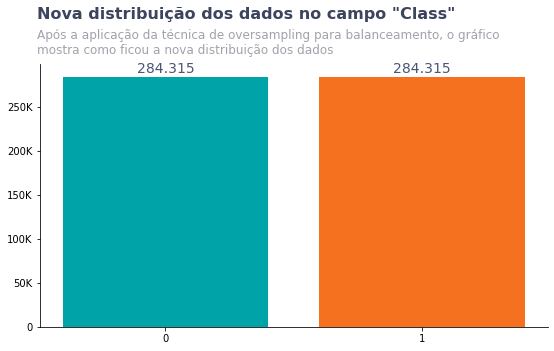

In [19]:
#B - Definição dos Hyperparametros
ros = RandomOverSampler(random_state=0)

#C - Separação dos dados e calculo do fit
X_resampled, y_resampled = ros.fit_resample(X, y)

#D - Plotagem do gráfico mostrando a nova distribuição

bcase_1 = np.count_nonzero(y_resampled == 1) #qtd. de casos com fraude
bcase_0 = np.count_nonzero(y_resampled == 0) #qtd. de casos sem fraude

y = ['0', '50K', '100K', '150K', '200K', '250K']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar('0', bcase_0, color = blue)
ax.bar('1', bcase_1, color = orange)

ax.text(x=-0.5, y=350000, s='Nova distribuição dos dados no campo "Class"', 
        fontsize=16, fontweight='bold', color=gray_title)
ax.text(x=-0.5, y=310000, s='Após a aplicação da técnica de oversampling para balanceamento, o gráfico\nmostra como ficou a nova distribuição dos dados', 
        fontsize=12, color=gray_subtitle)

#mudança na aparência
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticklabels(y)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 14)

plt.tight_layout();

###4.5.2) **Separação dos dados em conjunto de treino e teste** 

Separar novamente os dados X e y em grupos de treino e grupos de teste. Os dados de treino são utilizados para calcular o Fit e capacidade preditiva do modelo. Os dados de teste para verificar a qualidade do modelo. 

In [20]:
#Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

###4.6) **Fit do modelo** 

Os dados de treino serão utilizados para "treinar" o modelo e calcular seu Fit, ou seja, tornar o modelo capaz de identificar padrões nos dados.

In [21]:
#Fit
model.fit(X_train, y_train)

LogisticRegression()

###4.7) **Previsão do modelo** 

Os dados, após passados pelo processo de Fit, são utilizados para prever casos futuros.

In [22]:
#Predict
y_pred = model.predict(X_test)

A seguir serão aplicadas algumas técnicas para verificar a qualidade do modelo proposto. As técnicas escolhidas foram:

* **R²**: O R-quadrado estima a proporção dos valores da(s) variável(is) que são explicados/previstos pela(s) variável(is) independente(s) em um modelo preditivo. Quanto maior o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo. 

* **MAE (Mean Absolute Error)**: O Erro Médio Absoluto estima a diferença entre os valores estimados pelo modelo e os efetivamente ocorrrido em termos absolutos. Quanto menor o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo.  
* **MSE (Mean Squared Error)**: O Erro Quadrado Absoluto estima a diferença entre os valores estimados pelo modelo e os efetivamente ocorrrido, ambos elevados ao quadrado. Quanto menor o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo. 
* **Classification Report**:
  * **Precision**: Calcula a proporção dos valores corretamente previstos como "positivos" (previstos como sendo fraudes) em relação ao total de casos **previstos** como positivos, ou seja, considerando os Falsos Positivos (valores erroneamente classificados como fraudes)
  * **Recall**: Calcula a proporção dos valores corretamente previstos como "positivos" em relação ao total de casos que **efetivamente** fazem parte do total de casos positivos, ou seja, considerando os Falsos Negativos (valores que são fraudes, mas não foram identificados)
* **Confusion Matrix**: A Matriz de Confusão destaca a proporção dos valores separados em 4 grupos de valores:
  * TP (True Positives): % dos dados previstos como "positivo" (fraude) que realmente eram fraudes 
  * TN (True Negatives): % dos dados previstos como "negativos" (não fraude) que realmente eram não eram fraudes 
  * FP (False Positives): % dos dados erroneamente previstos como "positivo", pois não eram fraudes 
  * FN (False Negatives): % dos dados erroneamente previstos como "negativos", pois eram fraudes 

R² Score: 	0.80
MAE: 		0.05
MSE: 		0.05

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     71214
           1       0.98      0.92      0.95     70944

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158




Text(111.12, 0.5, 'Verdadeiro')

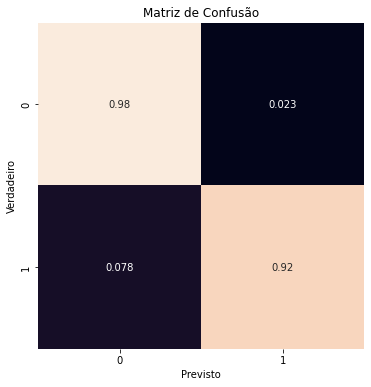

In [23]:
#Verificação da qualidade do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Interessa analisar brevemente os resultados obtidos e o que eles significam para a qualidade do modelo preditivo utilizado.

* O R-quadrado de 0.8 indica uma boa capacidade das variáveis independentes de explicar/prever com sucesso a variável dependente (`Class`). Em geral, valores entre 0.8 e 0.9 são considerados muito bons. 
* Os baixos valores de MAE e MSE (ambos de .05) indicam que os valores previstos são bem próximos dos valores efetivos, reforçando a capacidade do modelo de prever resultados bem proximos dos dados de teste utilizados
* Os resultados de Precision e Recall também foram bastante positivos. 
  * Um resultados de 0.98 em Precision indica que foram poucas vezes que o modelo erroneamente previu casos de fraude. 
  * Já o resultado de 0.92 em Recall mostra que poucas vezes o modelo deixou de incluir um caso verdadeiro de Fraude.

No contexto deste projeto, Recall possui uma relevância maior do que Precision. Identificar um caso erroneamente como fraude pode causar certos atritos com clientes e gerar alguns custos a mais. Entretanto, deixar de identificar um caso como fraude pode resultar em danos muito mais sérios sobre receita, relação com clientes, imagem, etc. Portanto, um modelo que seja mais preciso em seu Recall em detrimento da penalização de Precision é bem mais favorável.

Por fim, ao observar a Matriz de Confusão, os valores representam a distribuição percentual dos dados em relação a previsão X real. %2,2 dos casos foram dados previstos como fraude cujos valores não foram de fraude. No outro extremo, 7,9% dos casos foram previstos como não fraude cujos valores foram de fraude. 

Importa destacar que como os valores utilizados para construção do nosso modelo foram criados a partir de uma técnica de balanceamento, a técnica escolhida possui considerável impacto no resultado obtido, seja positivo ou negativo. 

Apesar dos valores obtidos serem considerados bons, é interessante examinar se utilizando outros tipos de técnicas de Oversampling seria possível obter resultados mais ótimos para do modelo. Das diversas técnicas existentes, duas merecem destaque: SMOTE e ADASYN.

###SMOTE (Synthetic Minority Over Sampling Technique)

De maneira simplificada, a técnica SMOTE identifica os dados do conjunto minoritário de forma a estabelecer conexões entre cada um dos valores e seus vizinhos mais próximos (ou k-means) de maneira a criar um "espaço" para este grupo. A partir disto, novos valores são criados ao longo do intervalo de distância que existe entre os valores originais. 

Por um lado o procedimento é vantajoso, pois permite criar valores fidedignos, pois estão localizados em um espectro próximo ao de valores originais. Entretanto, esta técnica também pode ser desvantajosa, pois não considera os valores do grupo majoritátio em sua confecção. A figura abaixo representa como funciona o procedimento. 

Para um entendimento mais extenso desta técnica, recomendo o seguinte [artigo explicando a técnica](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) e o seguinte [video explicando a lógica e como executá-la em Python](https://www.youtube.com/watch?v=U3X98xZ4_no&t=392s).

<img src="https://iq.opengenus.org/content/images/2019/09/COVER-1.PNG">

In [24]:
#Importação da técnica SMOTE de oversampling
from imblearn.over_sampling import SMOTE

Todos os demais procedimentos abaixo seguem os mesmos princípios utilizados anteriormente. Alguns passos não foram repetidos, pois já foram executados anteriormente e estão citados como forma de facilitar o entendimento de como funcionaria o procedimento caso executado pela primeira vez.

###Logistic Regression

In [25]:
#1 - Escolha do Modelo (FEITO)

#2 - Hyperparametros (FEITO)

#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

In [26]:
#B - Hyperparametros
sm = SMOTE(random_state=0) #Aplicação do método SMOTE em vez de Random Sampling

#C - Separar dados
X_resampled, y_resampled = sm.fit_resample(X, y) #Criação dos dados em Class

In [27]:
#3.1 - Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model.fit(X_train, y_train)

#5 - Predict
y_pred = model.predict(X_test)

R² Score: 	0.79
MAE: 		0.05
MSE: 		0.05

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     71246
           1       0.97      0.92      0.95     70912

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158




Text(111.12, 0.5, 'Verdadeiro')

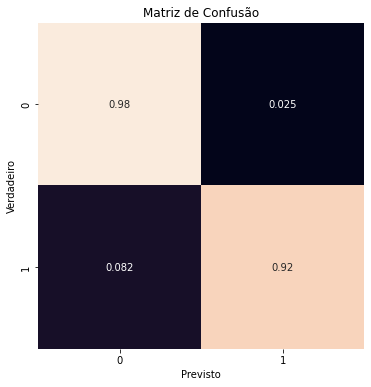

In [28]:
#Verificação da qualidade do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Comparando os resultados do SMOTE em relação ao Random Sample, não é possível identificar mudanças significativas.

* O R² foi de 0.79, praticamente igual ao do modelo anterior de 0.81.
* O MAE e MSE dos dois modelos foram praticamente iguais também (0.05).
* Precision e Racall também foram praticamente igual em ambos os modelos.
* Os valores de Previsto X Real também ficaram praticamente igual em ambos os modelos, com destaque para o Falso Negativo que subiu de 0.079 para 0.082. 

###ADASYN (Adaptative Synthetic)

Similar ao SMOTE, esta técnica também busca criar novos valores para o grupo minoritário considerando a localização dos valores e o espaço de distância entre eles. Entretanto, esta técnica se diferencia da SMOTE em um aspecto chave. Os valores gerados pela técnica ADASYN ao utilizar a densidade de acumulo de valores como critério. Em outras palavras, a técnica gera mais valores onde existe uma baixa concentração de casos reais no espectro minoritário e cria menos valores onde existe uma alta concentração de casos reais. A imagem abaixo representa a diferença das técnicas SMOTE e ADASYN respectivamente.

<img src="https://www.researchgate.net/publication/348078650/figure/fig3/AS:975004695003136@1609470642047/Difference-between-ADASYN-and-SMOTE-algorithms.ppm">


In [29]:
#Importação da técnica ADASYN de oversampling
from imblearn.over_sampling import ADASYN

###Logistic Regression

In [30]:
#1 - Escolha do Modelo (FEITO)

#2 - Hyperparametros (FEITO)

#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

In [31]:
#B - Hyperparametros
ad = ADASYN(random_state=0)

#C - Separar dados
X_resampled, y_resampled = ad.fit_resample(X, y)

In [32]:
#3.1 - Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model.fit(X_train, y_train)

#5 - Predict
y_pred = model.predict(X_test)

R² Score: 	0.54
MAE: 		0.11
MSE: 		0.11

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     70898
           1       0.90      0.86      0.88     71258

    accuracy                           0.89    142156
   macro avg       0.89      0.89      0.89    142156
weighted avg       0.89      0.89      0.89    142156




Text(111.12, 0.5, 'Verdadeiro')

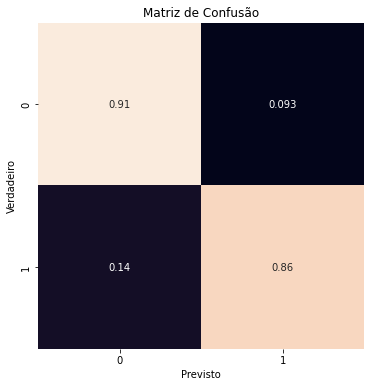

In [33]:
#Verificar o sucesso do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Comparando os resultados do ADASYN em relação ao Random Sample e SMOTE, é possível identificar uma leve piora nos resultados.

* O R² foi de 0.55, bem menor em relação aos resultados anteriores (0.81 e 0.79).
* O MAE e MSE também subiu para 0.11, maior que nos modelos anteriores (0.05).
* Precision e Racall também foram menores quando comparados aos dois outros modelos, mas não foram tão baixos no geral.
* Os valores de Previsto X Real também sofreram uma leve pior. Os Falsos Positivos chegaram a valores de 9.5% e os valores de Falso Negativo chegaram a valores de 13%. 

Pode-se concluir que das técnicas utilizadas a Random Sample e SMOTE trouxeram os melhores resultados de forma que o modelo obtidos apresentou ótimos valores em todos os indicadores de qualidade (R², MAE, MSE, Precision e Recall). Pode-se destacar que um único indicador que poderia ser interessante de apresentar uma melhora poderia ser os Falsos Negativos, pois eles tem grande impacto no funcionamento do negócio.

Até o momento todos os modelos utilizados foram criados através de regressões logísticas. Entretanto existem outros modelos de classificação que podem ser capazes de trazer resultados melhores. Um destes modelos é o Decision Tree (ou Árvore de Decisão).

###Decision Tree

A Árvore de Decisão é outra clássica metodologia de aprendizado supervisionado para modelos de classificação. Ela utiliza uma lógica de "se...então", por exemplo, se o valor em `Amount` no nosso conjunto de dados for maior que X, então o modelo determina que pode ser mais provável que seja sim um caso de fraude. 

De forma sucessiva o modelo analisa cada um dos atributos (colunas) no conjunto de dados e determina quais deles são capazes de distinguir com mais capacidade os casos de fraude dos casos que não são fraude. A partir disso "ramos" são formados onde, de um lado, temos teóricamente 2 conjuntos: um com dados só de fraude e outro com casos só de não fraude. Entretanto, isto não ocorre na maioria das vezes, pois ocorrem casos de Falsos Positivos e Falsos Negativos em ambos os grupos.

Em seguida, um novo diferente em cada um dos ramos é utilizado para separar novamente os dados em 2 ramos, cada vez mais tentando alcançar a separação com maior pureza possível, ou seja, grupos puramente de fraude e sem fraude. A imagem abaixo representa de forma bem simplificada a lógica desta metodologia.

<img src="https://miro.medium.com/max/2584/0*PB7MYQfzyaLaTp1n">

In [34]:
#1 - Escolher modelo
from sklearn.tree import DecisionTreeClassifier

#2 - Hyperparametros
model_b1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model_b2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_b3 = DecisionTreeClassifier(max_depth=8, criterion='entropy')
model_b4 = DecisionTreeClassifier(max_depth=16, criterion='entropy')

Como pode ser observado, foram criados 4 modelos diferentes de Machine Learning onde a diferença reside nos hyperparametros. O hyperparametro "max_depth" define a quantidade de ramos que a Decision Tree irá possuir. Este é um critério importante, pois um modelo com poucos ramos pode ser muito superficial e impacaz de prever com alto grau os casos de fraude. Por outro lado, um excesso de ramos pode resultar em um overfitting nos no modelo, tornado ele rígido e inefetivo na sua capacidade preditiva ao receber um novo conjunto de dados.

Portanto, serão testados 4 extensões de ramos diferentes e examindados os seus resultados em quesitos de qualidade do modelo.

In [35]:
#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

#3.1 - Balanceamento dos dados

#3.1.1 - Hyperparametros
ros = RandomOverSampler(random_state=0)

#3.1.2 - Separar dados
X_resampled, y_resampled = ros.fit_resample(X, y)

#3.2 - Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.66
MAE: 		0.09
MSE: 		0.09

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     70895
           1       0.91      0.92      0.92     71263

    accuracy                           0.91    142158
   macro avg       0.91      0.91      0.91    142158
weighted avg       0.91      0.91      0.91    142158




Text(111.12, 0.5, 'Verdadeiro')

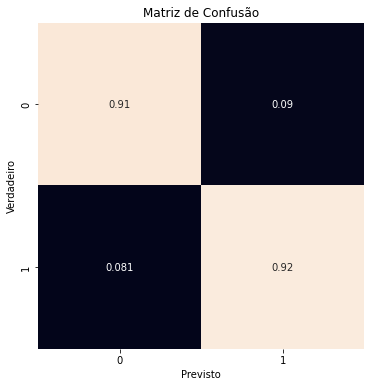

In [36]:
#Verificar sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.76
MAE: 		0.06
MSE: 		0.06

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     70895
           1       0.99      0.89      0.94     71263

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158




Text(111.12, 0.5, 'Verdadeiro')

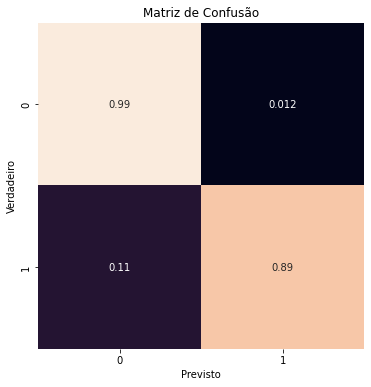

In [37]:
#Verificar sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.93
MAE: 		0.02
MSE: 		0.02

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     70895
           1       0.97      0.99      0.98     71263

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158




Text(111.12, 0.5, 'Verdadeiro')

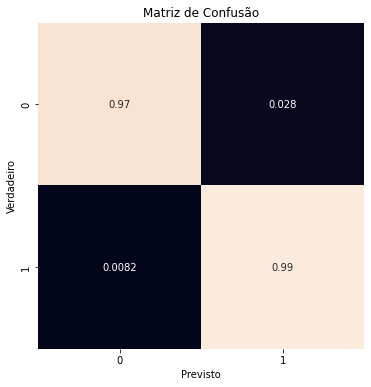

In [38]:
#Verificar sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	1.00
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70895
           1       1.00      1.00      1.00     71263

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

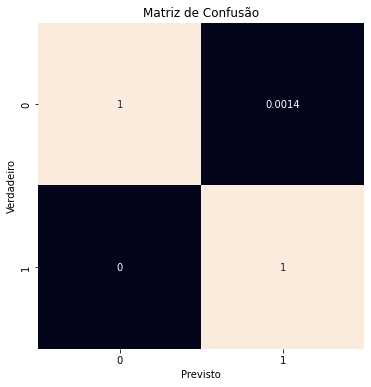

In [39]:
#Verificar sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Ao analisar os 4 modelos é possível identificar certos comportamentos nos resultados de qualidade obtidos. 

Primeiramente o R², MAE e MSE foram melhorando conforme mais ramos foram adicionados à árvore. Inicialmente, o modelo com 2 ramos apresentou baixo R² (0.66) e MAE (0.09) e MSE (0.09) levemente altos. 

Em seguida, os valores de Precision e Recall também foram melhorando. O primeiro modelo já apresentou bons resultados, de maneira que foram bem semelhantes com os resultados do modelo de regressão logística utilizado anteriormente (Precision = 0.91; Recall = 0.91).

Por fim, ao analisar os Falsos Positivos e Falsos Negativo, houve significativa melhora. Os modelos de b1 (2 ramos) e b2 (4 ramos) se comportaram similar aos casos no modelo de regressão logística com FN em torno de 0.08 e 0.11 e FP em torno de 0.01 e 0.09. 

Vale destacar os resultados bem mais favoráveis no modelo b3 (8 ramos). Nele, os Falsos Negativos (0.0086) e Falsos Positivos reduziram drásticamente (0.027). Como já mencionado anteriormente, é altamente relevante para o caso em questão reduzir o total de Falsos Negativos de maneira a evitar o máximo que casos de fraude passem pelo filtro do modelo.

Uma última observação diz respeito ao modelo b4 (16 ramos). Seus resultados foram perfeitos em todas as categorias de qualidade. Isto é um forte indicativo de overfitting do modelo, ou seja, ele é capaz de segmentar perfeitamente os grupos fraude e não fraude do conjunto de dados utilizado oferecido. Caso novos dados fossem utilizados, este modelo não seria capaz de prevê-los com sucesso. 

Este resultado também pode servir de fundamento para questionar o modelo b3. É possível que ele também esteja sofrendo com problemas de overfitting, apesar de existirem certa margem de erro em todos os resultados.

Como próximo passo, similar ao modelo de Regressão Logística, a utilização das técnicas de SMOTE e ADASYN para oversampling foram aplicadas e novos modelos gerados com o intuito de identificar melhoras nos resultados.

###Decision Tree - SMOTE (Synthetic Minority Over Sampling Technique)

In [40]:
#B - Hyperparametros
sm = SMOTE(random_state=0) #Aplicação do método SMOTE em vez de Random Sampling

#C - Separar dados
X_resampled, y_resampled = sm.fit_resample(X, y) #Criação dos dados em Class

In [41]:
#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.65
MAE: 		0.09
MSE: 		0.09

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     70895
           1       0.99      0.84      0.91     71263

    accuracy                           0.91    142158
   macro avg       0.92      0.91      0.91    142158
weighted avg       0.92      0.91      0.91    142158




Text(111.12, 0.5, 'Verdadeiro')

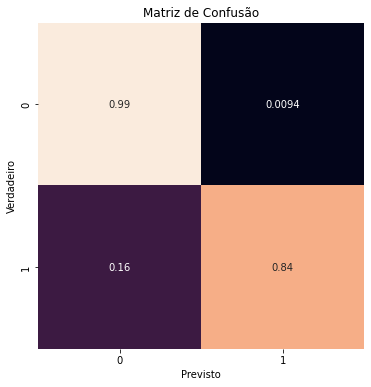

In [42]:
#Verificar sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.75
MAE: 		0.06
MSE: 		0.06

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     70895
           1       0.98      0.89      0.93     71263

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158




Text(111.12, 0.5, 'Verdadeiro')

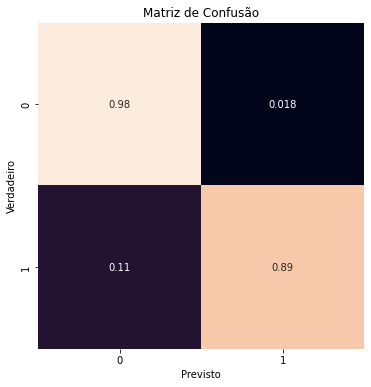

In [43]:
#Verificar sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.87
MAE: 		0.03
MSE: 		0.03

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     70895
           1       0.97      0.97      0.97     71263

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158




Text(111.12, 0.5, 'Verdadeiro')

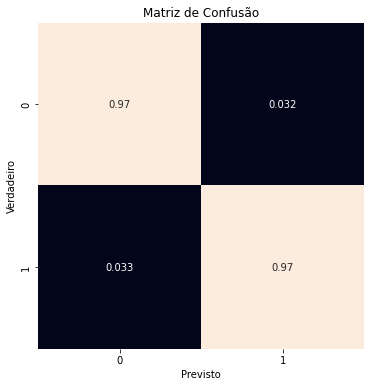

In [44]:
#Verificar sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.99
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70895
           1       1.00      1.00      1.00     71263

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

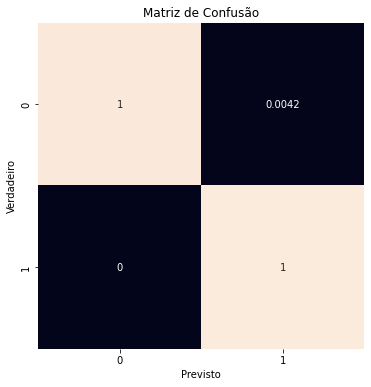

In [45]:
#Verificar sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

###Decision Tree - ADASYN (Adaptative Synthetic)


In [46]:
#B - Hyperparametros
ad = ADASYN(random_state=0)

#C - Separar dados
X_resampled, y_resampled = ad.fit_resample(X, y)

In [47]:
#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.39
MAE: 		0.15
MSE: 		0.15

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     70895
           1       0.78      0.96      0.86     71263

    accuracy                           0.85    142158
   macro avg       0.87      0.85      0.84    142158
weighted avg       0.87      0.85      0.84    142158




Text(111.12, 0.5, 'Verdadeiro')

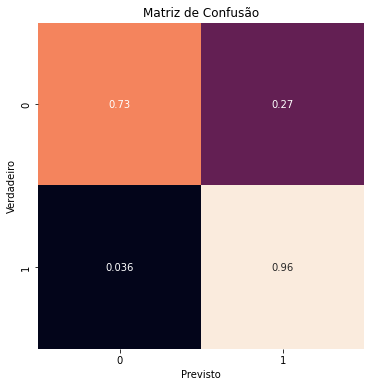

In [48]:
#Verificar o sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.64
MAE: 		0.09
MSE: 		0.09

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     70895
           1       0.87      0.96      0.91     71263

    accuracy                           0.91    142158
   macro avg       0.91      0.91      0.91    142158
weighted avg       0.91      0.91      0.91    142158




Text(111.12, 0.5, 'Verdadeiro')

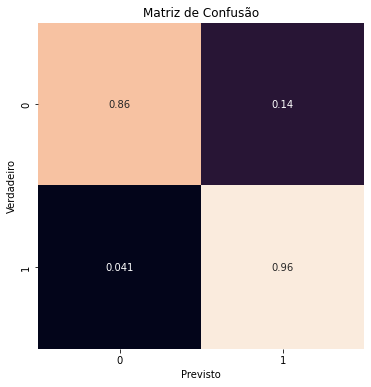

In [49]:
#Verificar o sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE
#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.82
MAE: 		0.04
MSE: 		0.04

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     70895
           1       0.94      0.98      0.96     71263

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158




Text(111.12, 0.5, 'Verdadeiro')

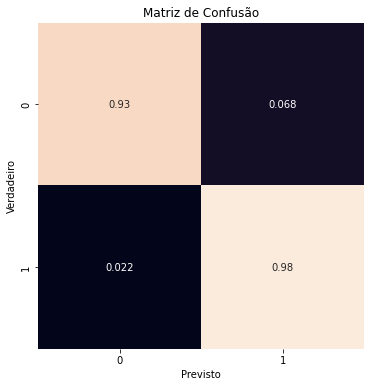

In [50]:
#Verificar o sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.99
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     70895
           1       0.99      1.00      1.00     71263

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

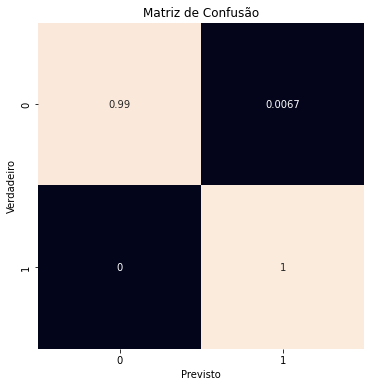

In [51]:
#Verificar o sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Em relação a utilização das técnicas de SMOTE e ADASYN, os resultados foram bastante similares as resultados que utilizaram Random Sampling.

* O comportamento dos indicadores de qualidade (R², MAE, MSE) se comportaram de maneira praticamente igual.
* Novamente, o melhor modelo tanto em SMOTE quanto ADASYN foi o b3 (8 ramos). Entretanto, nestes modelos, os resultados de Falso Negativo sofreram uma leve piora. O modelo em Random Sampling apresentou FN de 0.0083. Em SMOTE este valor foi de 0.033 e em ADASYN este foi de 0.022.
* Todos os modelos com 16 ramos apresentaram evidência de overfit, e não é possível descartar a possibilidade de que os modelos b3 sofram um pouco deste problema também.

## 5) Conclusão

Através da aplicação de métodos de Machine Learning supervisionados, foi possível criar um modelo preditivo com alta capacidade de identificação de fraudes de cartão de crédito. O melhor modelo obtido apresentou altos indicadores de qualidade na identificação e segmentação dos casos de fraude e casos de não fraude.

Ao todo 2 métodos de aprendizado por classificação foram utilizados: Regressão Logística e Árvore de Decisão. Neste projeto, o segundo método apresentou melhores resultados, apesar da diferença ser bem leve entre ambos os métodos. Vale reforçar que não existe superioridade geral entre metodologias, assim caso o problema a ser resulvido fosse diferente possivelmente a Regressão Logística seria um método com resultados mais ótimos. 

Vale reforçar também a utilização de 3 técnicas diferentes de balanceamento de dados devido a pouca quantidade de casos de fraude comparados aos de não fraude. Cada técnica utiliza lógicas matemáticas diferentes para gerar novos valores e, novamente, não existe uma solução mais ideal. No presente projeto todos os resultados foram bem próximos uns dos outros. Deve-se destacar que a técnica de Undersampling não foi aplicada neste projeto. Esta foi uma escolha pessoal, pois a perda de informação com a redução de dados seria bem extrema, possivelmente reduzindo o poder explicativo do modelo. 

Destaca-se também que um dos principais critérios de desempate utilizados neste projeto foi a proporção de Falsos Negativos. No problema em mãos de fraude de cartão, deixar de identificar um caso como fraude é muito pior do que erroneamento identificar um caso como fraude, pois a diferença sobre o impacto financeiro é muito maior. O problema de negócios deve ser o centro de qualquer solução de Machine Learning, portanto, seja qual for o projeto construído, ele deve ter no escopo os ganhos e perdas que geram para o negócio.

